In [12]:
import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = f'/content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/metricas'
os.chdir(path)
print(f'O diretório atual é: {os.getcwd()}')

O diretório atual é: /content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/metricas


In [ ]:
def plot_sim_history(sim_history):
  dpi = 600
  size_view = (16, 10)
  size_fig = (20, 5)

  fig, axs = plt.subplots(3, 1, figsize=size_view)

  axs[0].plot(sim_history['x'], label='x')
  axs[0].plot(sim_history['ref'], label='ref', linestyle=':')
  axs[0].set_xlabel("Steps/Time(s)")
  axs[0].set_ylabel("Level(m)")
  axs[0].set_title('Controle  Aprendizado Por Reforço')
  axs[0].set_xticks(np.arange(0, 1100, 100))
  axs[0].set_xlim(0, 1000)
  axs[0].legend()
  axs[0].grid(True)  # Adiciona uma grade ao gráfico

  axs[1].plot(sim_history['qe'], label='qe')
  axs[1].plot(sim_history['qs'], label='qs')
  axs[1].set_ylabel("(m^3/s)")
  axs[1].set_title('Sinal Aprendizado Por Reforço')
  axs[1].set_xticks(np.arange(0, 1100, 100))
  axs[1].set_xlim(0, 1000)
  axs[1].legend()
  axs[1].grid(True)  # Adiciona uma grade ao gráfico

  axs[2].plot(sim_history['erro'], label='erro')
  axs[2].set_ylabel("erro (m)")
  axs[2].set_title('Erro Aprendizado Por Reforço')
  axs[2].set_xticks(np.arange(0, 1100, 100))
  axs[2].set_xlim(0, 1000)
  axs[2].legend()
  axs[2].grid(True)  # Adiciona uma grade ao gráfico


  fig.tight_layout()  # Ajusta o layout

  fig.savefig(f'{plot_name}.png', format='png', dpi=dpi)

  # Salvar cada subplot individualmente
  for i, ax in enumerate(axs):
      # Criar uma nova figura para cada subplot
      fig_single, ax_single = plt.subplots(figsize=size_fig)
      # Copiar o conteúdo do subplot original para a nova figura
      for line in ax.get_lines():
          ax_single.plot(line.get_xdata(), line.get_ydata(), label=line.get_label(), linestyle=line.get_linestyle())
      ax_single.set_xlim(ax.get_xlim())
      ax_single.set_ylim(ax.get_ylim())
      ax_single.set_xticks(ax.get_xticks())
      ax_single.set_title(ax.get_title())
      ax_single.set_xlabel(ax.get_xlabel())
      ax_single.set_ylabel(ax.get_ylabel())
      ax_single.legend()
      ax_single.grid(True)  # Adiciona uma grade ao gráfico

      # Salvar a figura individual
      fig_single.tight_layout()
      fig_single.savefig(f'{plot_name}-{i + 1}.png', format='png', dpi=dpi)
      plt.close(fig_single)  # Fechar a figura para liberar memória

  plt.show()

In [ ]:
def metrics_control(path_sim_history):
  # Carregar os dados do CSV em um DataFrame
  df = pd.read_csv(path_sim_history).head(200)

  # Calcular o erro entre setpoint e variável controlada
  erro = df['ref'] - df['x']

  # 1. Calcular o Erro Médio ou Erro Quadrático Médio (MSE)
  mse = np.mean(erro**2)  # Erro Quadrático Médio
  erro_medio = np.mean(erro)  # Erro Médio

  # 2. Calcular o Tempo de Estabilização
  # Supondo que o tempo seja a linha onde o erro fica abaixo de uma certa tolerância
  tolerancia = 0.05  # Por exemplo, 5% do setpoint
  tempo_estabilizacao = df.index[erro.abs() < tolerancia][0] if any(erro.abs() < tolerancia) else None

  # 3. Calcular o Overshoot
  overshoot = np.max(df['x']) - np.max(df['ref'])

  # 4. Calcular o Tempo de Subida
  tempo_subida = df.index[np.argmax(df['x'] > df['ref'])] if any(df['x'] > df['ref']) else None

  # 5. Calcular o Tempo de Acomodação
  # Supondo que o tempo de acomodação seja a linha onde o erro fica dentro de uma certa tolerância por um período contínuo
  tolerancia_acomodacao = 0.01  # Por exemplo, 1% do setpoint
  index_acomodacao = df.index[erro.abs() < tolerancia_acomodacao]
  tempo_acomodacao = index_acomodacao[-1] - index_acomodacao[0] if len(index_acomodacao) > 1 else None

  # 6. Calcular o Erro em Regime Permanente
  erro_regime_permanente = np.mean(erro.iloc[-10:])  # Últimas 10 amostras como regime permanente

  # 7. Calcular a Taxa de Variação do Setpoint (Rampas)
  taxa_variacao_setpoint = np.gradient(df['ref']).mean()

  # Imprimir as métricas calculadas
  #print("Erro Quadrático Médio (MSE):", mse)
  #print("Erro Médio:", erro_medio)
  #print("Tempo de Estabilização:", tempo_estabilizacao)
  #print("Overshoot:", overshoot)
  #print("Tempo de Subida:", tempo_subida)
  #print("Tempo de Acomodação:", tempo_acomodacao)
  #print("Erro em Regime Permanente:", erro_regime_permanente)
  #print("Taxa de Variação do Setpoint:", taxa_variacao_setpoint)

  return [mse, erro_medio, tempo_estabilizacao, overshoot, tempo_subida, tempo_acomodacao, erro_regime_permanente]

In [ ]:
metrics = []
metrics.append(metrics_control(f'/content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/{"reinforcement-learning-r1"}/sim_history.csv'))
metrics.append(metrics_control(f'/content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/{"reinforcement-learning-r2"}/sim_history.csv'))
metrics.append(metrics_control(f'/content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/{"reinforcement-learning-r3"}/sim_history.csv'))
metrics

[[4.548285233888417,
  1.4767972770440445,
  None,
  -0.12794671582894246,
  None,
  None,
  0.13901860504466218],
 [2.8545734176655277,
  0.81481773290915,
  63,
  0.0613393915455589,
  69,
  72,
  0.020385301574221516],
 [2.842475950776572,
  0.8110671355280796,
  62,
  0.0045301063148990295,
  153,
  21,
  0.03282847010425769]]

In [73]:
pmc_nn = pd.read_csv(f'{path}/sim_history-pmc_nn.csv')
pmc_nn_x1 = pd.read_csv(f'{path}/pmc_nn-x1.csv', names=["x1"])
pmc_nn_x2 = pd.read_csv(f'{path}/pmc_nn-x2.csv', names=["x2"])

pmc_x1 = pd.read_csv(f'{path}/pmc-x1.csv', names=["x1"])
pmc_x2 = pd.read_csv(f'{path}/pmc-x2.csv', names=["x2"])

rl_x1 = pd.read_csv(f'{path}/rl-x1.csv', names=["x1"])
rl_x2 = pd.read_csv(f'{path}/rl-x2.csv', names=["x2"])


pmc = pd.read_csv(f'{path}/sim_history-pmc.csv')
rl = pd.read_csv(f'{path}/sim_history-rf.csv')

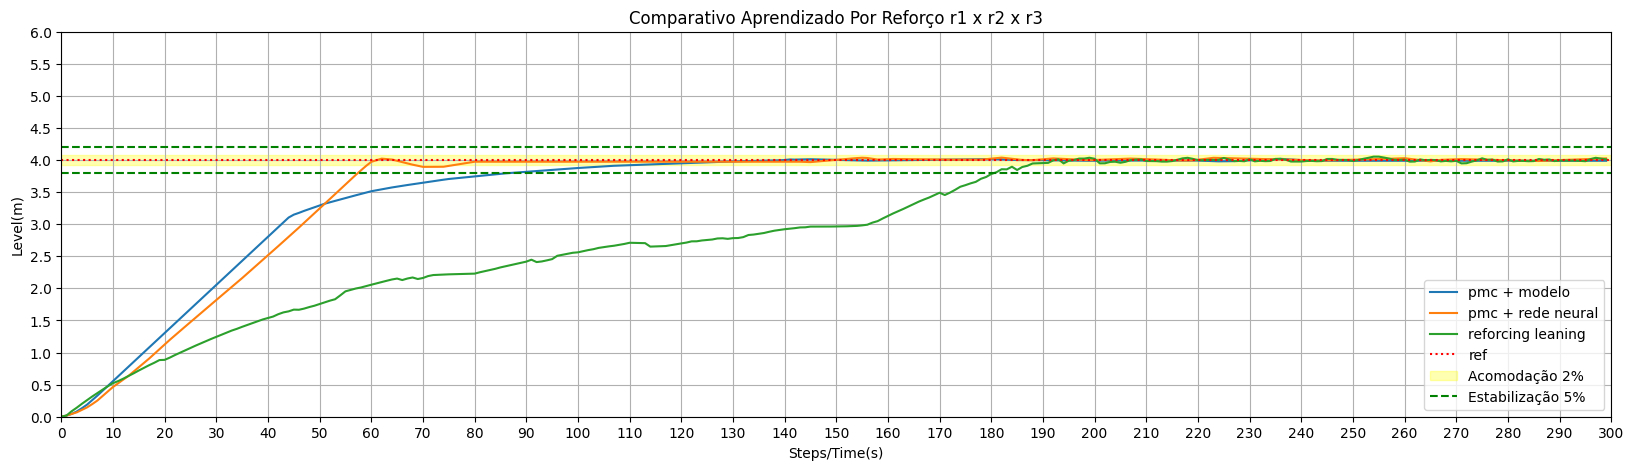

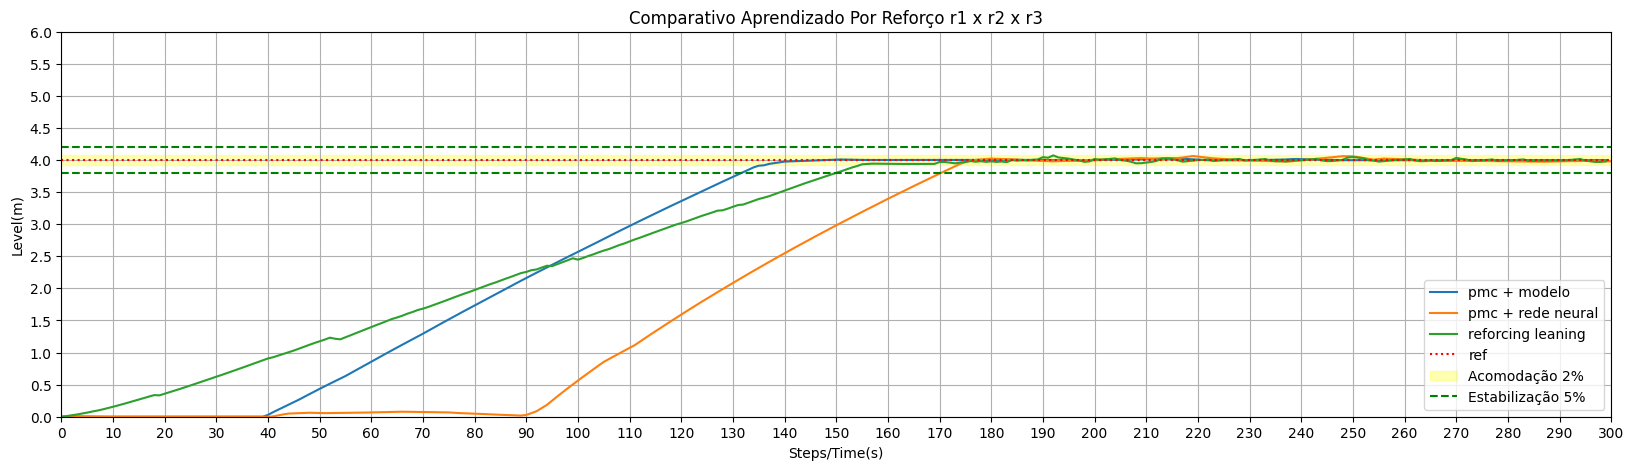

In [77]:
plt.figure(figsize=(20, 5))

ref = 4

plt.plot(pmc_x1['x1'], label='pmc + modelo')
plt.plot(pmc_nn_x1['x1'], label='pmc + rede neural')
plt.plot(rl_x1['x1'], label='reforcing leaning')

plt.axhline(y=ref, label='ref', linestyle=':', color='red')

plt.fill_between(pmc.index, ref*0.98, ref*1.02, color='yellow', alpha=0.3, label='Acomodação 2%')
plt.axhline(y=ref * 0.95, color='green', linestyle='--', label='Estabilização 5%')
plt.axhline(y=ref * 1.05, color='green', linestyle='--')

plt.xlabel("Steps/Time(s)")
plt.ylabel("Level(m)")
plt.title('Comparativo Aprendizado Por Reforço r1 x r2 x r3')
plt.xticks(np.arange(0, 305, 10))
plt.xlim(0, 300)

plt.yticks(np.arange(0, 6.5, 0.5))
plt.ylim(0, 6)

plt.legend()
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/{"metricas"}/comparativo_pmc-pmc_nn-rl-x1.png', format='png', dpi=600)


plt.figure(figsize=(20, 5))

ref = 4

plt.plot(pmc_x2['x2'], label='pmc + modelo')
plt.plot(pmc_nn_x2['x2'], label='pmc + rede neural')
plt.plot(rl_x2['x2'], label='reforcing leaning')

plt.axhline(y=ref, label='ref', linestyle=':', color='red')

plt.fill_between(pmc.index, ref*0.98, ref*1.02, color='yellow', alpha=0.3, label='Acomodação 2%')
plt.axhline(y=ref * 0.95, color='green', linestyle='--', label='Estabilização 5%')
plt.axhline(y=ref * 1.05, color='green', linestyle='--')

plt.xlabel("Steps/Time(s)")
plt.ylabel("Level(m)")
plt.title('Comparativo Aprendizado Por Reforço r1 x r2 x r3')
plt.xticks(np.arange(0, 305, 10))
plt.xlim(0, 300)

plt.yticks(np.arange(0, 6.5, 0.5))
plt.ylim(0, 6)

plt.legend()
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/{"metricas"}/comparativo_pmc-pmc_nn-rl-x2.png', format='png', dpi=600)

In [80]:
# Função para calcular o tempo de subida
def tempo_subida(df, coluna_sinal, perc_inicio=0.1, perc_fim=0.9):
    """
    Calcula o tempo de subida de um sinal em um DataFrame usando o índice como tempo.

    Parâmetros:
    df - DataFrame contendo os dados
    coluna_sinal - nome da coluna do sinal de controle
    perc_inicio - porcentagem inicial do valor final (default: 0.1, ou 10%)
    perc_fim - porcentagem final do valor final (default: 0.9, ou 90%)

    Retorno:
    tempo_subida - o tempo de subida
    """
    t = df.index.values
    y = df[coluna_sinal].values

    y_final = y[-1]

    # Valores de 10% e 90% do valor final
    y_inicio = perc_inicio * y_final
    y_fim = perc_fim * y_final

    # Encontrar os índices correspondentes aos valores de 10% e 90%
    idx_inicio = np.where(y >= y_inicio)[0][0]
    idx_fim = np.where(y >= y_fim)[0][0]

    # Tempo correspondente ao tempo de subida
    tempo_subida = t[idx_fim] - t[idx_inicio]

    return tempo_subida

# Calcular o tempo de subida
ts_pmc_x1 = tempo_subida(pmc_x1, 'x1')
ts_pmc_x2 = tempo_subida(pmc_x2, 'x2')

ts_pmc_nn_x1 = tempo_subida(pmc_nn_x1, 'x1')
ts_pmc_nn_x2 = tempo_subida(pmc_nn_x2, 'x2')

ts_rl_x1 = tempo_subida(rl_x1, 'x1')
ts_rl_x2 = tempo_subida(rl_x2, 'x2')

print(f"Tempo de ts_pmc_x1: {ts_pmc_x1} segundos")
print(f"Tempo de ts_pmc_x2: {ts_pmc_x2} segundos")

print(f"Tempo de ts_pmc_nn_x1: {ts_pmc_nn_x1} segundos")
print(f"Tempo de ts_pmc_nn_x2: {ts_pmc_nn_x2} segundos")

print(f"Tempo de ts_rl_x1: {ts_rl_x1} segundos")
print(f"Tempo de ts_rl_x2: {ts_rl_x2} segundos")

Tempo de ts_pmc_x1: 58 segundos
Tempo de ts_pmc_x2: 77 segundos
Tempo de ts_pmc_nn_x1: 46 segundos
Tempo de ts_pmc_nn_x2: 67 segundos
Tempo de ts_rl_x1: 168 segundos
Tempo de ts_rl_x2: 121 segundos


In [98]:
def erro_regime_permanente(df, coluna_sinal, setpoint, periodo_estavel):
    """
    Calcula o erro em regime permanente de um sinal em um DataFrame usando o índice como tempo.

    Parâmetros:
    df - DataFrame contendo os dados
    coluna_sinal - nome da coluna do sinal de controle
    setpoint - valor desejado do setpoint
    periodo_estavel - intervalo de tempo para considerar que o sistema está em regime permanente

    Retorno:
    erro_rp - o erro em regime permanente
    """
    # Determinar o tempo final
    tempo_final = df.index[-1]

    # Considerar os dados nos últimos periodo_estavel segundos
    dados_regime_permanente = df[df.index >= (tempo_final - periodo_estavel)]

    # Valor médio do sinal no regime permanente
    valor_medio_rp = dados_regime_permanente[coluna_sinal].mean()

    # Calcular o erro em regime permanente
    erro_rp = setpoint - valor_medio_rp

    return erro_rp

# Calcular o erro em regime permanente
setpoint = 4  # Valor final desejado
periodo_estavel = 120  # Últimos 10 segundos para considerar o regime permanente

erp_pmc_x1 = erro_regime_permanente(pmc_x1, 'x1', setpoint, periodo_estavel)
erp_pmc_x2 = erro_regime_permanente(pmc_x2, 'x2', setpoint, periodo_estavel)

erp_pmc_nn_x1 = erro_regime_permanente(pmc_nn_x1, 'x1', setpoint, periodo_estavel)
erp_pmc_nn_x2 = erro_regime_permanente(pmc_nn_x2, 'x2', setpoint, periodo_estavel)

erp_rl_x1 = erro_regime_permanente(rl_x1, 'x1', setpoint, periodo_estavel)
erp_rl_x2 = erro_regime_permanente(rl_x2, 'x2', setpoint, periodo_estavel)

print(f"Erro em regime permanente erp_pmc_x1: {erp_pmc_x1}")
print(f"Erro em regime permanente erp_pmc_x2: {erp_pmc_x2}")

print(f"Erro em regime permanente erp_pmc_nn_x1: {erp_pmc_nn_x1}")
print(f"Erro em regime permanente erp_pmc_nn_x2: {erp_pmc_nn_x2}")

print(f"Erro em regime permanente erp_rl_x1: {erp_rl_x1}")
print(f"Erro em regime permanente erp_rl_x2: {erp_rl_x2}")

Erro em regime permanente erp_pmc_x1: 0.007206611570249155
Erro em regime permanente erp_pmc_x2: -0.002107438016527574
Erro em regime permanente erp_pmc_nn_x1: -0.008966942148759927
Erro em regime permanente erp_pmc_nn_x2: 0.0031157024793389
Erro em regime permanente erp_rl_x1: 0.016190082644627957
Erro em regime permanente erp_rl_x2: 0.0015041322314051087


In [100]:
def tempo_estabilizacao(df, coluna_sinal, setpoint, tolerancia=0.05):
    """
    Calcula o tempo de estabilização de um sinal em um DataFrame.

    Parâmetros:
    df - DataFrame contendo os dados
    coluna_sinal - nome da coluna do sinal de controle
    setpoint - valor desejado do setpoint
    tolerancia - faixa de tolerância em torno do valor final (default: 0.05, ou 5%)

    Retorno:
    tempo_estab - o tempo de estabilização
    """
    t = df.index.values
    y = df[coluna_sinal].values

    # Faixa de tolerância
    faixa_superior = setpoint * (1 + tolerancia)
    faixa_inferior = setpoint * (1 - tolerancia)

    # Encontrar o índice onde o sinal entra na faixa de tolerância e permanece lá
    idx_estab = np.where((y >= faixa_inferior) & (y <= faixa_superior))[0]

    if len(idx_estab) == 0:
        return None

    for idx in idx_estab:
        if np.all((y[idx:] >= faixa_inferior) & (y[idx:] <= faixa_superior)):
            tempo_estab = t[idx]
            break
    else:
        tempo_estab = None

    return tempo_estab

# Calcular os tempos de estabilização e acomodação
te_pmc_x1 = tempo_estabilizacao(pmc_x1, 'x1', 4)
te_pmc_x2 = tempo_estabilizacao(pmc_x2, 'x2', 4)

te_pmc_nn_x1 = tempo_estabilizacao(pmc_nn_x1, 'x1', 4)
ta_pmc_nn_x2 = tempo_estabilizacao(pmc_nn_x2, 'x2', 4)

te_rl_x1 = tempo_estabilizacao(rl_x1, 'x1', 4)
te_rl_x2 = tempo_estabilizacao(rl_x2, 'x2', 4)

print(f"Tempo de te_pmc_x1: {te_pmc_x1} segundos")
print(f"Tempo de ta_pmc_x2: {te_pmc_x2} segundos")

print(f"Tempo de te_pmc_nn_x1: {te_pmc_nn_x1} segundos")
print(f"Tempo de te_pmc_nn_x2: {ta_pmc_nn_x2} segundos")

print(f"Tempo de te_rl_x1: {te_rl_x1} segundos")
print(f"Tempo de te_rl_x2: {te_rl_x2} segundos")

Tempo de te_pmc_x1: 88 segundos
Tempo de ta_pmc_x2: 132 segundos
Tempo de te_pmc_nn_x1: 58 segundos
Tempo de te_pmc_nn_x2: 171 segundos
Tempo de te_rl_x1: 181 segundos
Tempo de te_rl_x2: 150 segundos


In [97]:
def tempo_acomodacao(df, coluna_sinal, setpoint, tolerancia=0.02):
    """
    Calcula o tempo de acomodação de um sinal em um DataFrame.

    Parâmetros:
    df - DataFrame contendo os dados
    coluna_sinal - nome da coluna do sinal de controle
    setpoint - valor desejado do setpoint
    tolerancia - faixa de tolerância em torno do valor final (default: 0.02, ou 2%)

    Retorno:
    tempo_acom - o tempo de acomodação
    """
    t = df.index.values
    y = df[coluna_sinal].values

    # Faixa de tolerância
    faixa_superior = setpoint * (1 + tolerancia)
    faixa_inferior = setpoint * (1 - tolerancia)

    # Encontrar o índice onde o sinal entra na faixa de tolerância e permanece lá
    idx_acom = np.where((y >= faixa_inferior) & (y <= faixa_superior))[0]

    if len(idx_acom) == 0:
        return None

    for idx in idx_acom:
        if np.all((y[idx:] >= faixa_inferior) & (y[idx:] <= faixa_superior)):
            tempo_acom = t[idx]
            break
    else:
        tempo_acom = None

    return tempo_acom

ta_pmc_x1 = tempo_acomodacao(pmc_x1, 'x1', 4)
ta_pmc_x2 = tempo_acomodacao(pmc_x2, 'x2', 4)

ta_pmc_nn_x1 = tempo_acomodacao(pmc_nn_x1, 'x1', 4)
ta_pmc_nn_x2 = tempo_acomodacao(pmc_nn_x2, 'x2', 4)

ta_rl_x1 = tempo_acomodacao(rl_x1, 'x1', 4)
ta_rl_x2 = tempo_acomodacao(rl_x2, 'x2', 4)

print(f"Tempo de ta_pmc_x1: {ta_pmc_x1} segundos")
print(f"Tempo de ta_pmc_x2: {ta_pmc_x2} segundos")

print(f"Tempo de ta_pmc_nn_x1: {ta_pmc_nn_x1} segundos")
print(f"Tempo de ta_pmc_nn_x2: {ta_pmc_nn_x2} segundos")

print(f"Tempo de ta_rl_x1: {ta_rl_x1} segundos")
print(f"Tempo de ta_rl_x2: {ta_rl_x2} segundos")

Tempo de ta_pmc_x1: 110 segundos
Tempo de ta_pmc_x2: 137 segundos
Tempo de ta_pmc_nn_x1: 76 segundos
Tempo de ta_pmc_nn_x2: 174 segundos
Tempo de ta_rl_x1: 188 segundos
Tempo de ta_rl_x2: 155 segundos
